# 1. Uvod

In [15]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import datasets
from sklearn import decomposition
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

# 2. Učitavanje podataka

In [16]:
#df=pd.read_csv("Wine.csv")
#df.info()

df=datasets.load_boston()

In [17]:
#df["Customer_Segment"].unique()

In [18]:
#X = df.drop("Customer_Segment",axis=1)
#y = df["Customer_Segment"]

X=df.data
y=df.target

# 3. Redukcija dimenzionalnosti

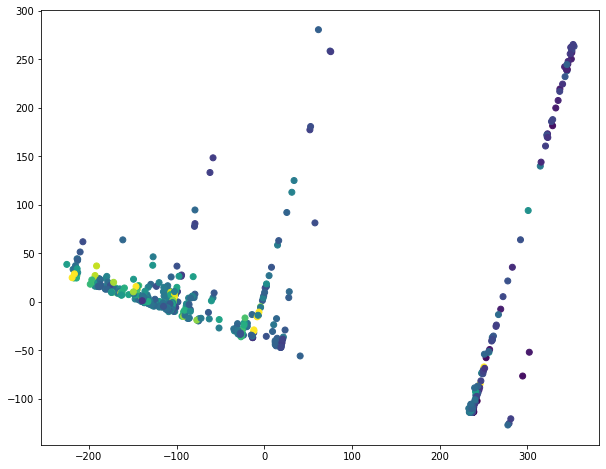

In [19]:
X_pca=decomposition.PCA(n_components='mle',svd_solver='auto').fit_transform(X)

plt.figure(figsize=(10,8))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.show()

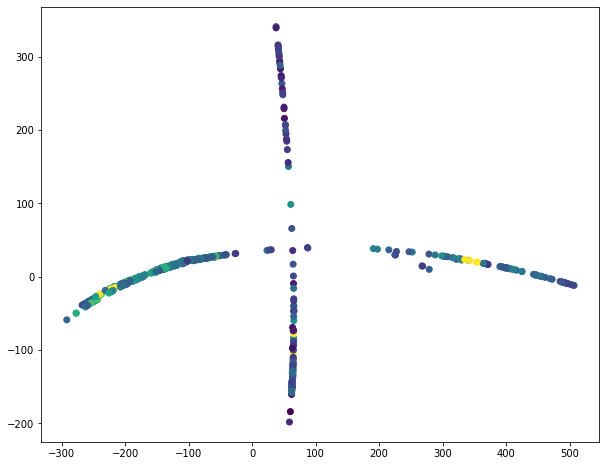

In [20]:
embedding=Isomap(n_components=2,n_neighbors=5)
X_isomap=embedding.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y)
plt.show()

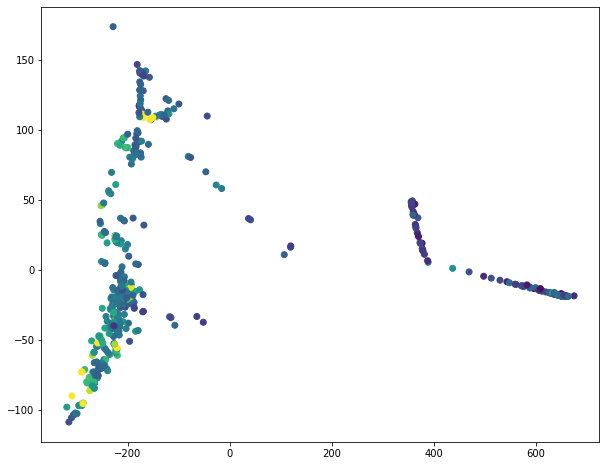

In [21]:
embedding=Isomap(n_components=2,n_neighbors=40)
X_isomap=embedding.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y)
plt.show()

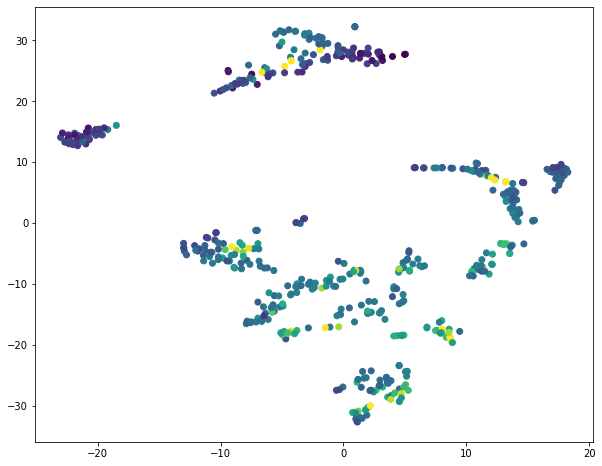

In [22]:
RS = 20150101
X_tsne = TSNE(random_state=RS,learning_rate=5,metric="euclidean").fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.show()

# 4. Vizuelizacija odnosa redukcije dimenzionalnosti

<Figure size 432x288 with 0 Axes>

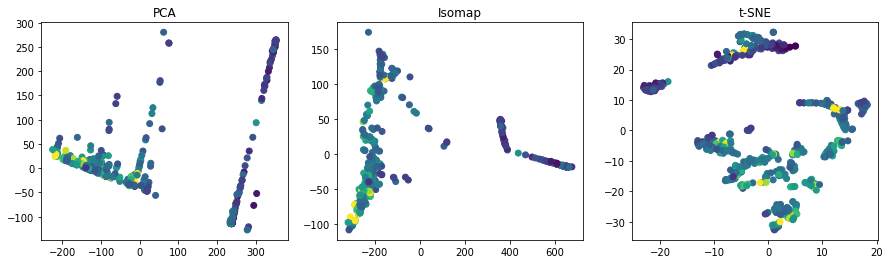

In [23]:
fig = plt.figure(figsize=(6, 4))
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
_ = ax1.set_title('PCA')
ax2.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y)
_ = ax2.set_title('Isomap')
ax3.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
_ = ax3.set_title('t-SNE')

plt.show()